In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn import metrics 
import seaborn as sns
%config InlineBackend.figure_format = 'retina' #Эта строчка улучшает качевство на маках с ретиной. 
                                                #Если у вас не ретина, удалите


In [3]:
sns.set()# Set seaborn aesthetic parameters to defaults

In [4]:
x = [1,2,3,4,5,6,7,8,9,10,11]
y = [2,5,10,17,26,37,50,65,82,101,122]

In [5]:
# не обязательно
# что, если данных больше?
# def f(x):
#     return x**2+1

# amount = 100
# y = []
# x = list(range(amount))
# for i in range(amount):
#     y.append(f(i))


In [6]:
df = pd.DataFrame({'x' : x, 'y' : y})
df

,x,y
0,1,2
1,2,5
2,3,10
3,4,17
4,5,26
5,6,37
6,7,50
7,8,65
8,9,82
9,10,101


## Давайте отобразим наши данные на графике, чтобы понять, с чем имеем дело

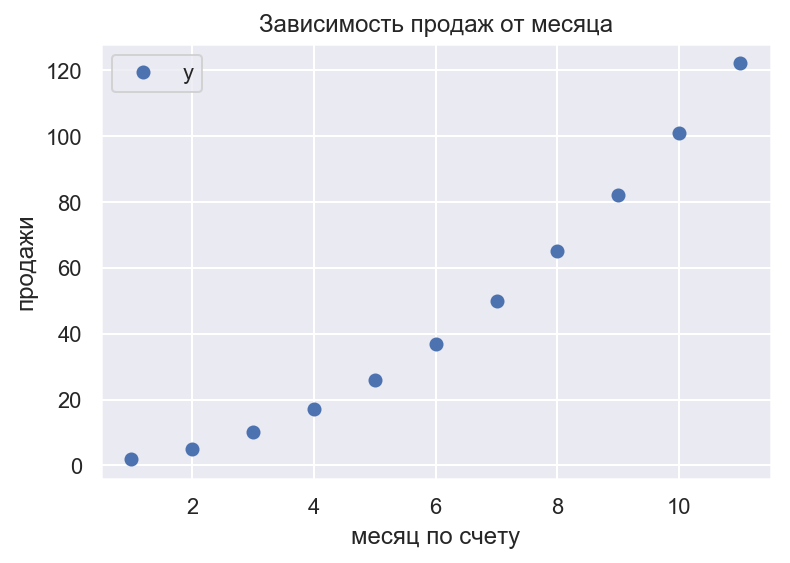

In [7]:
df.plot(x='x', y='y', style='o')  
plt.title('Зависимость продаж от месяца')  
plt.xlabel('месяц по счету')  
plt.ylabel('продажи')  
plt.show()  

## "Обзовем" данные, согласно традициям ML, так же разобьем их на тестовые и тренировочные

In [8]:
x = np.array(x).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

## Давайте посмотрим на то, как выглядят разбитые данные

## Так выглядит тренировочная выборка

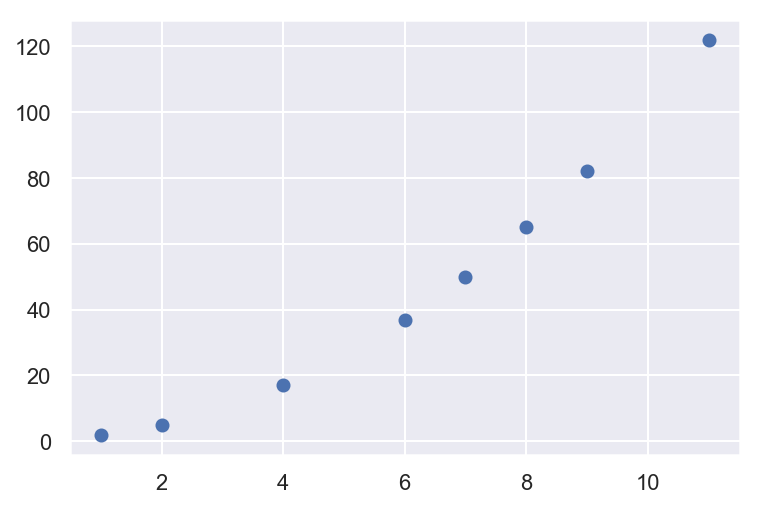

In [9]:
plt.scatter(X_train, y_train)
plt.show()

## А так - тестовая

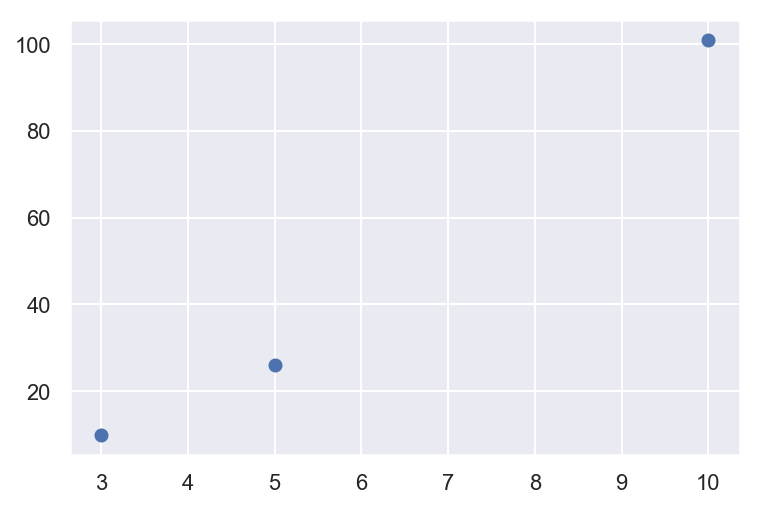

In [10]:
plt.scatter(X_test, y_test)
plt.show()

## Первой попробуем линейную регрессию

In [11]:
from sklearn.linear_model import LinearRegression# импортируем линейную регрессию

linReg = LinearRegression() # в переменную записываем нашу регерссию 
linReg.fit(X_train, y_train) # обучаем
linReg_y_pred = linReg.predict(X_test) #записываем предсказания

linReg_df_pred = pd.DataFrame({'Actual': np.reshape(y_test,len(y_test)), 'Predicted': np.reshape(linReg_y_pred,len(linReg_y_pred))})
linReg_df_pred

,Actual,Predicted
0,26,35.928571
1,101,93.785714
2,10,12.785714


In [12]:
linReg_MAE = metrics.mean_absolute_error(y_test, linReg_y_pred)
linReg_MSE = metrics.mean_squared_error(y_test, linReg_y_pred)
linReg_RMSE = np.sqrt(metrics.mean_squared_error(y_test, linReg_y_pred))
print('Mean Absolute Error:', linReg_MAE)  
print('Mean Squared Error:', linReg_MSE)  
print('Root Mean Squared Error:',linReg_RMSE ) 
print(linReg.score(X_test,y_test))

Mean Absolute Error: 6.642857142857139
Mean Squared Error: 52.79421768707476
Root Mean Squared Error: 7.265962956626931
0.9664490919938094


## Попробуем другой алгоритм регрессии - KNeighborsRegressor(Регрессия К ближайших соседей)

In [13]:
from sklearn.neighbors import KNeighborsRegressor 

KNReg = KNeighborsRegressor()
KNReg.fit(X_train, y_train) 

KNReg_y_pred = KNReg.predict(X_test)

KNReg_df_pred = pd.DataFrame({'Actual': np.reshape(y_test,len(y_test)), 'Predicted': np.reshape(KNReg_y_pred,len(KNReg_y_pred))})
KNReg_df_pred

,Actual,Predicted
0,26,34.8
1,101,71.2
2,10,22.2


In [14]:
KNReg_MAE = metrics.mean_absolute_error(y_test, KNReg_y_pred)
KNReg_MSE = metrics.mean_squared_error(y_test, KNReg_y_pred)
KNReg_RMSE = np.sqrt(metrics.mean_squared_error(y_test, KNReg_y_pred))
print('Mean Absolute Error:', KNReg_MAE)  
print('Mean Squared Error:', KNReg_MSE)  
print('Root Mean Squared Error:', KNReg_RMSE) 

Mean Absolute Error: 16.933333333333334
Mean Squared Error: 371.4399999999999
Root Mean Squared Error: 19.27277873063456


## При стандартном значении кол-ва соседей резултат совсем не радостный. Попробуем n_neighbors=2

In [15]:
from sklearn.neighbors import KNeighborsRegressor 

KNReg = KNeighborsRegressor(n_neighbors=2)
KNReg.fit(X_train, y_train) 

KNReg_y_pred = KNReg.predict(X_test)

KNReg_df_pred = pd.DataFrame({'Actual': np.reshape(y_test,len(y_test)), 'Predicted': np.reshape(KNReg_y_pred,len(KNReg_y_pred))})
KNReg_df_pred

,Actual,Predicted
0,26,27.0
1,101,102.0
2,10,11.0


In [16]:
KNReg_MAE = metrics.mean_absolute_error(y_test, KNReg_y_pred)
KNReg_MSE = metrics.mean_squared_error(y_test, KNReg_y_pred)
KNReg_RMSE = np.sqrt(metrics.mean_squared_error(y_test, KNReg_y_pred))
print('Mean Absolute Error:', KNReg_MAE)  
print('Mean Squared Error:', KNReg_MSE)  
print('Root Mean Squared Error:', KNReg_RMSE) 

Mean Absolute Error: 1.0
Mean Squared Error: 1.0
Root Mean Squared Error: 1.0


## результат уже очень хорош

Смысла пробовать *Ridge* или *Lasso* нет, так как данные описаны параболой и мы уже убедились в неэффективности линейных регрессий. Эти же будут даже менее эффективны, так как гребневая прибегнет у уменьшению коэф-ов, а лассо и вовсе не будет иметь смысла, так как признак только один и избавляться не от чего

*Деревья*, *случайный лес* или *бустинг деревьев* так же не дадут результата, так как данные описываются не условиями, а зависимостью

## Однако, мы забыли про полиномиальную зависимость - по определению лучшую для нашей ситуации

In [17]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Lasso 

polynomReg = make_pipeline(PolynomialFeatures(2), Ridge())
polynomReg.fit(X_train, y_train)

polynomReg_y_pred = polynomReg.predict(X_test)

polynomReg_df_pred = pd.DataFrame({'Actual': np.reshape(y_test,len(y_test)), 
                                   'Predicted': np.reshape(polynomReg_y_pred,len(polynomReg_y_pred))})
polynomReg_df_pred

,Actual,Predicted
0,26,26.011759
1,101,100.990935
2,10,10.003732


In [18]:
polynomReg_MAE = metrics.mean_absolute_error(y_test, polynomReg_y_pred)
polynomReg_MSE = metrics.mean_squared_error(y_test, polynomReg_y_pred)
polynomReg_RMSE = np.sqrt(metrics.mean_squared_error(y_test, polynomReg_y_pred))
print('Mean Absolute Error:', polynomReg_MAE)  
print('Mean Squared Error:', polynomReg_MSE)  
print('Root Mean Squared Error:', polynomReg_RMSE) 

Mean Absolute Error: 0.008185454495463892
Mean Squared Error: 7.812842057182449e-05
Root Mean Squared Error: 0.008839028259476519


# А теперь более наглядно
    есть метод .score
    давайте посмотрим правильность разных моделей в процентах

In [19]:
print("Правильность KNreg на обучающем наборе: {:.3f}".format(KNReg.score(X_train, y_train))) 
print("Правильность KNreg на тестовом наборе: {:.3f}".format(KNReg.score(X_test, y_test))) 

Правильность KNreg на обучающем наборе: 0.944
Правильность KNreg на тестовом наборе: 0.999


In [20]:
print("Правильность linReg на обучающем наборе: {:.3f}".format(linReg.score(X_train, y_train))) 
print("Правильность linReg на тестовом наборе: {:.3f}".format(linReg.score(X_test, y_test))) 

Правильность linReg на обучающем наборе: 0.940
Правильность linReg на тестовом наборе: 0.966


In [21]:
print("Правильность polynomReg на обучающем наборе: {:.3f}".format(polynomReg.score(X_train, y_train))) 
print("Правильность polynomReg на тестовом наборе: {:.3f}".format(polynomReg.score(X_test, y_test))) 

Правильность polynomReg на обучающем наборе: 1.000
Правильность polynomReg на тестовом наборе: 1.000


Сравним с другими известными нам моделями регресси

In [23]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=5, random_state=0)
tree.fit(X_train, y_train)

from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=5, random_state=2) 
forest.fit(X_train, y_train)

from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(random_state=0, max_depth=10,learning_rate=0.1)
gbrt.fit(X_train, y_train)

print("Правильность tree на обучающем наборе: {:.3f}".format(tree.score(X_train, y_train))) 
print("Правильность tree на тестовом наборе: {:.3f}".format(tree.score(X_test, y_test))) 
print("Правильность forest на обучающем наборе: {:.3f}".format(forest.score(X_train, y_train))) 
print("Правильность forest на тестовом наборе: {:.3f}".format(forest.score(X_test, y_test))) 
print("Правильность gbrt на обучающем наборе: {:.3f}".format(gbrt.score(X_train, y_train))) 
print("Правильность gbrt на тестовом наборе: {:.3f}".format(gbrt.score(X_test, y_test))) 


tree_y_pred = tree.predict(X_test)
forest_y_pred = forest.predict(X_test)
gbrt_y_pred = gbrt.predict(X_test)

Правильность tree на обучающем наборе: 1.000
Правильность tree на тестовом наборе: 0.901
Правильность forest на обучающем наборе: 0.966
Правильность forest на тестовом наборе: 0.969
Правильность gbrt на обучающем наборе: 1.000
Правильность gbrt на тестовом наборе: 0.901


/Users/dinoz4vrick/miniconda3/envs/nnseries/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/Users/dinoz4vrick/miniconda3/envs/nnseries/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Посмотрим, как выглядят деревья

In [41]:
import numpy as np 
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

train_X = X_train
train_y = y_train
test_X = X_test

poly = PolynomialFeatures(degree=2)
train_X = poly.fit_transform(train_X)
test_X = poly.fit_transform(test_X)

clf = linear_model.LinearRegression()
clf.fit(train_X, train_y)
print (clf.predict(test_X))

[[ 26.]
 [101.]
 [ 10.]]


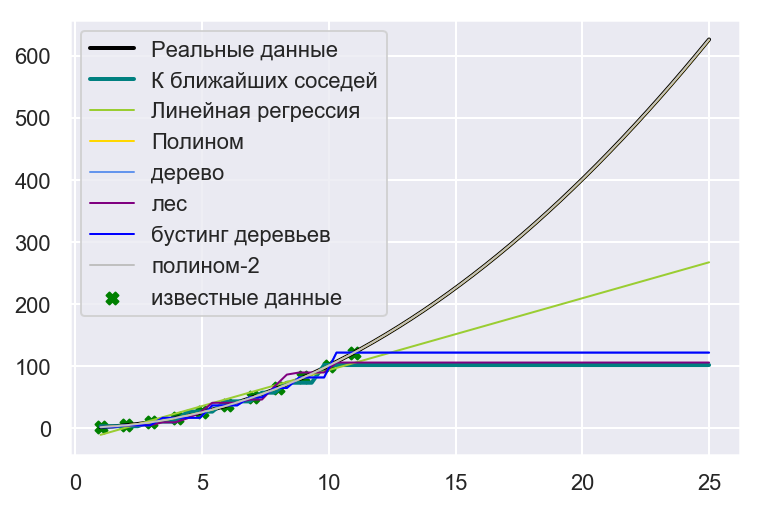

In [37]:
def f(x):
    return x**2+1

x_plot = np.linspace(1, 25)
X_plot = x_plot[:, np.newaxis]
lw = 1

colors = ['teal', 'yellowgreen', 'gold', 'cornflowerblue', 'purple', 'blue', 'silver']

plt.scatter(x,y,marker='X', color='green',label="известные данные")

plt.plot(x_plot, f(x_plot), color='black', linewidth=lw*2,
         label="Реальные данные")


y_plot = KNReg.predict(X_plot)
plt.plot(x_plot, y_plot, color=colors[0], linewidth=lw*2,
             label="К ближайших соседей")

y_plot = linReg.predict(X_plot)
plt.plot(x_plot, y_plot, color=colors[1], linewidth=lw,
             label="Линейная регрессия")

y_plot = polynomReg.predict(X_plot)
plt.plot(x_plot, y_plot,color=colors[2], linewidth=lw,
             label="Полином")

y_plot = tree.predict(X_plot)
plt.plot(x_plot, y_plot,color=colors[3], linewidth=lw,
             label="дерево")

y_plot = forest.predict(X_plot)
plt.plot(x_plot, y_plot,color=colors[4], linewidth=lw,
             label="лес")

y_plot = gbrt.predict(X_plot)
plt.plot(x_plot, y_plot,color=colors[5], linewidth=lw,
             label="бустинг деревьев")


y_plot = clf.predict(poly.fit_transform(X_plot))
plt.plot(x_plot, y_plot,color=colors[6], linewidth=lw,
             label="полином-2")

plt.legend(loc='best')
plt.show()